# Project: HR Analytics Employee Attrition Analysis and Prediction

In this project, you will find out why employee leaving the organization and what the reason behind it. So what is Attrition and what determines it? Attrition it is basically the turnover rate of employees inside an organization. 
This can happen for many reasons:
<ol>
    <li>Employees looking for better opportunities.</li>
    <li>A negative working environment.</li>
    <li>Bad management</li>
    <li>Sickness of an employee (or even death)</li>
    <li>Excessive working hours</li>
    <li>Etc</li>
</ol>

Because of the many reason we still dont know i will make data analysis and prediction to find out what is the reason for **Attrition** using the data from <a href="https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset"> this link</a>.
This notebook will help you to understand the data analysis and and machine learning that i will do. 

In [28]:
# Import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
from plotly.subplots import make_subplots
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef
from scipy.stats import randint, skew, kurtosis
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score, matthews_corrcoef, auc, log_loss, plot_roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## IBM has gathered information on employee satisfaction, income, seniority and some demographics. It includes the data of 1470 employees. To use a matrix structure, we changed the model to reflect the following data
| Name | Description |
| --- | --- |
| AGE | Numerical Value | 
| ATTRITION | Employee leaving the company (0=no, 1=yes) | 
| BUSINESS TRAVEL | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely) | 
| DAILY RATE | Numerical Value - Salary Level |
| DEPARTMENT | (1=HR, 2=R&D, 3=Sales) |
| DISTANCE FROM HOME | Numerical Value - THE DISTANCE FROM WORK TO HOME |
| EDUCATION | Numerical Value |
| EDUCATION FIELD | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL) |
| EMPLOYEE COUNT | Numerical Value |
| ENVIROMENT SATISFACTION | Numerical Value - SATISFACTION WITH THE ENVIROMENT |
| GENDER | (1=FEMALE, 2=MALE) |
| HOURLY RATE | HOURLY RATE |
| JOB INVOLVEMENT | Numerical Value - JOB INVOLVEMENT |
| JOB LEVEL | Numerical Value - LEVEL OF JOB |
| JOB ROLE | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION | Numerical Value - SATISFACTION WITH THE JOB |
| MARITAL STATUS | (1=DIVORCED, 2=MARRIED, 3=SINGLE) |
| MONTHLY INCOME | Numerical Value - MONTHLY SALARY |
| MONTHY RATE |	Numerical Value - MONTHY RATE |
| NUMCOMPANIES WORKED |	Numerical Value - NO. OF COMPANIES WORKED AT |
| OVER 18 |	(1=YES, 2=NO) |
| OVERTIME | (1=NO, 2=YES) |
| PERCENT SALARY HIKE |	Numerical Value - PERCENTAGE INCREASE IN SALARY |
| PERFORMANCE RATING | Numerical Value - ERFORMANCE RATING |
| RELATIONS SATISFACTION |	Numerical Value - RELATIONS SATISFACTION |
| STANDARD HOURS | Numerical Value - STANDARD HOURS |
| STOCK OPTIONS LEVEL |	Numerical Value - STOCK OPTIONS |
| TOTAL WORKING YEARS |	Numerical Value - TOTAL YEARS WORKED |
| TRAINING TIMES LAST YEAR | Numerical Value - HOURS SPENT TRAINING |
| WORK LIFE BALANCE | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE |
| YEARS AT COMPANY | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY |
| YEARS IN CURRENT ROLE | Numerical Value -YEARS IN CURRENT ROLE |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION |
| YEARS WITH CURRENT MANAGER |	Numerical Value - YEARS SPENT WITH CURRENT MANAGER |

In [29]:
df = pd.read_csv('IBM_HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [322]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning & Preprocessing

In [3]:
# How much your data is missing?
df.isnull().sum().sort_values(ascending=False)

YearsWithCurrManager        0
EmployeeCount               0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EmployeeNumber              0
EducationField              0
JobSatisfaction             0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobRole                     0
MaritalStatus               0
YearsSinceLastPromotion     0
StandardHours               0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
MonthlyIncome               0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
Over18                      0
NumCompaniesWorked          0
MonthlyRat

As we can see from the data above there is no missing data.

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The data is showing that type of data is already mathcing with the data but some data is tend to be categorical like **Education**, **EnvironmentSatisfaction**, **JobInvolvement**, **JobSatisfaction**, **PerformanceRating**, **RelationshipSatisfaction**, and **WorkLifeBalance**.

In [30]:
# Change type data into obj because data is categorical
df['Education'] = df['Education'].astype(str)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(str)
df['JobRole'] = df['JobRole'].astype(str)
df['JobInvolvement'] = df['JobInvolvement'].astype(str)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(str)
df['PerformanceRating'] = df['PerformanceRating'].astype(str)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(str)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(str)
df['JobRole'] = df['JobRole'].astype(str)
df['Attrition'] = df['Attrition'].astype(str)
# Mengubah data yes no menjadi 1 dan 0
df.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)
# df.OverTime.replace(('Yes', 'No'), (1, 0), inplace=True)
# df.Education.replace(('Below College', 'College', 'Bachelor', 'Master', 'Doctor'), (1, 2, 3, 4, 5), inplace=True)
# df.EnvironmentSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
# df.JobInvolvement.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
# df.JobSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
# df.PerformanceRating.replace(('Low', 'Good', 'Excellent', 'Outstanding'), (1, 2, 3, 4), inplace=True)
# df.RelationshipSatisfaction.replace(('Low', 'Medium', 'High', 'Very High'), (1, 2, 3, 4), inplace=True)
# df.RelationshipSatisfaction.replace(('Bad', 'Good', 'Better', 'Best'), (1, 2, 3, 4), inplace=True)
# df.JobRole.replace(('Laboratory Technician', 'Sales Executive', 'Research Scientist', 'Sales Representative', "Human Resources", 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Director' ), (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
# Transform categorical data into dummies
data_dum = pd.get_dummies(df, drop_first=True)
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   MonthlyIncome                      1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  StandardHours       

In [32]:
pd.set_option('display.max_columns', None)
data_dum.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
1,49,0,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
3,33,0,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
4,27,0,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [5]:
print(data_dum.shape)

# Remove duplicate Features
data_dum = data_dum.T.drop_duplicates()
data_dum = data_dum.T

# Remove Duplicate Rows
data_dum.drop_duplicates(inplace=True)

print(data_dum.shape)

(1470, 61)
(1470, 61)


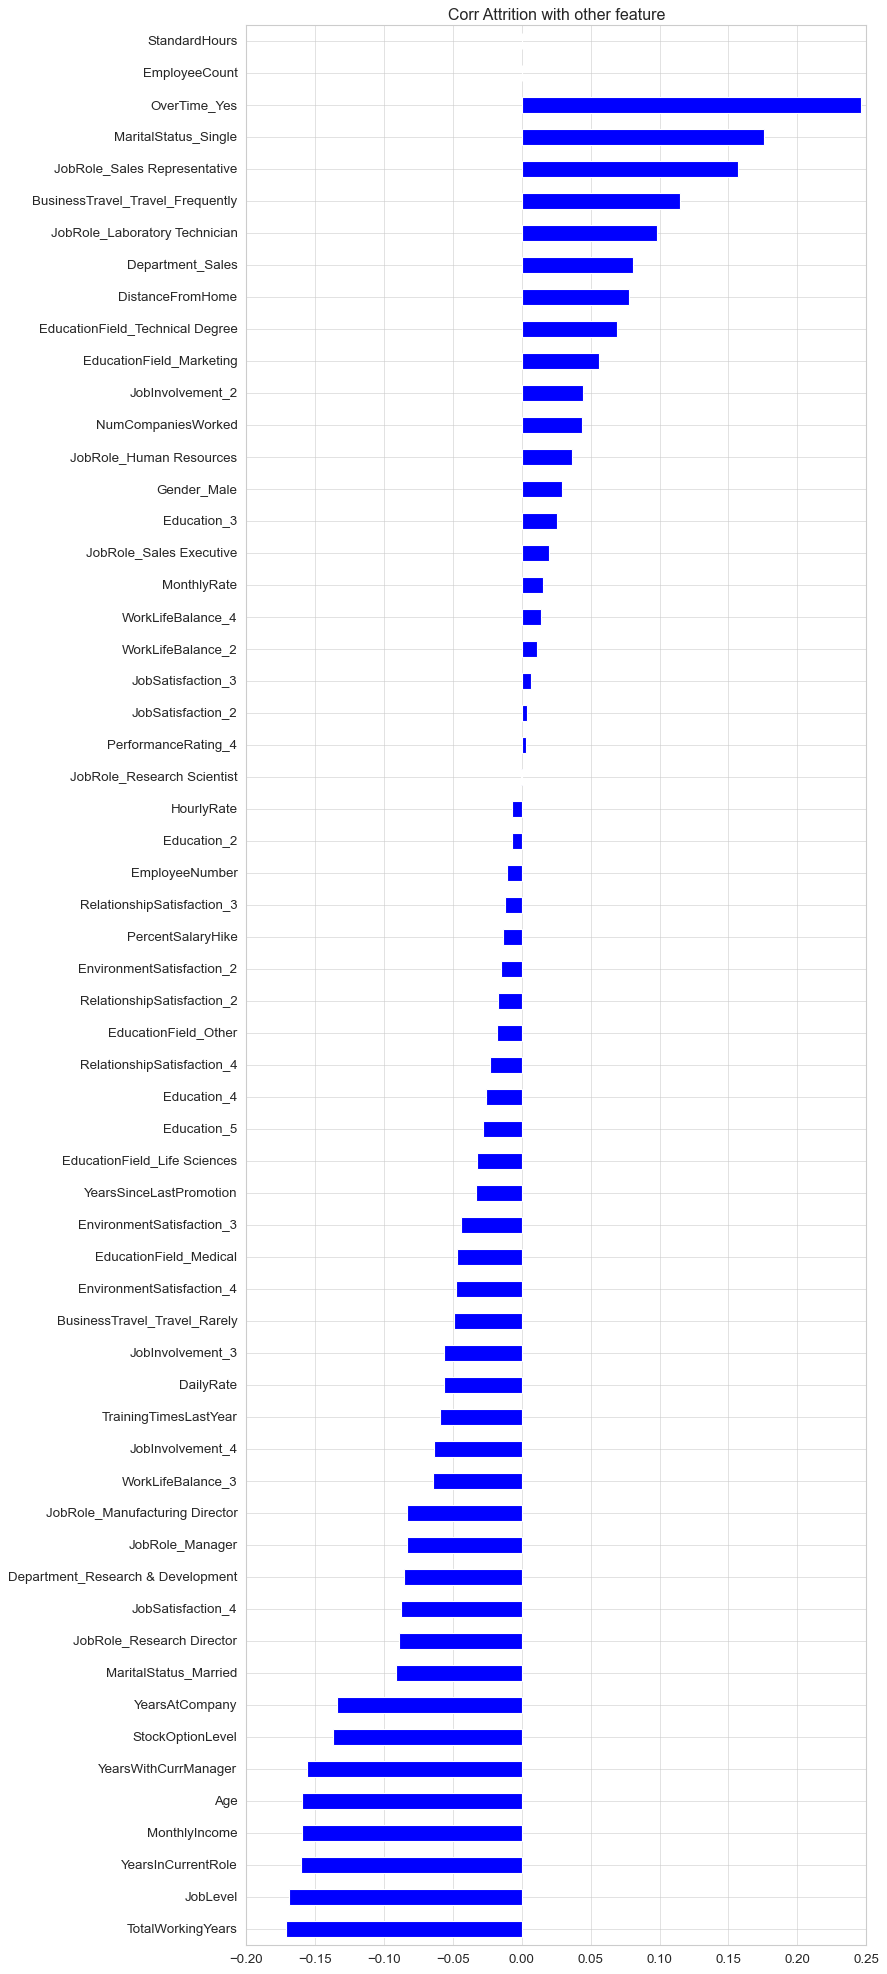

In [7]:
plt.style.use('classic')
sns.set_style("whitegrid")
plt.title('Corr Attrition with other feature')
data_dum.drop('Attrition', axis=1).corrwith(data_dum.Attrition, method='pearson').sort_values().plot(kind='barh', figsize=(10, 30))
plt.savefig("correlation")
# corr rasio, kremers v

The data above is showing the correlation between **Attrition** with every feature in the data.<br>

**Overtime** have the highest positive correlation with **Attrition** which mean when **Overtime** rate is high there is possibility that **Attrition** rate is also high.<br> 

at the other hand **TotalWorkingYears** have the highest negatif correlation which mean when **TotalWorkingYears** rate is low there is possiblity that **Attrition** is high. 

**StandardHours** and **EmployeeCount** have zero correlation which's mean that have no correlation with **Attrition**

## EDA (Exploratory Data Analysis)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [334]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

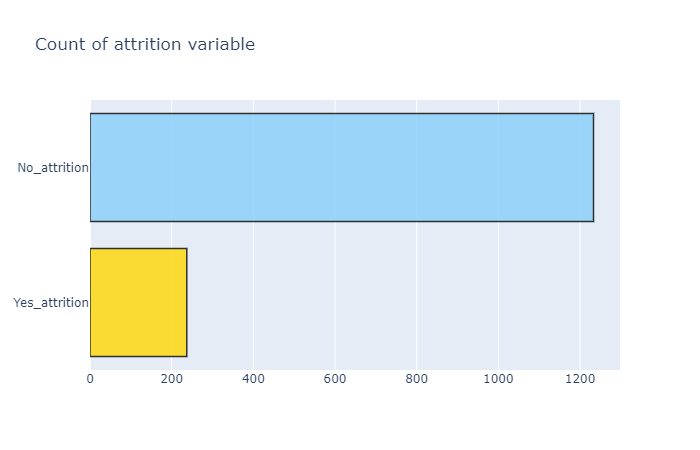

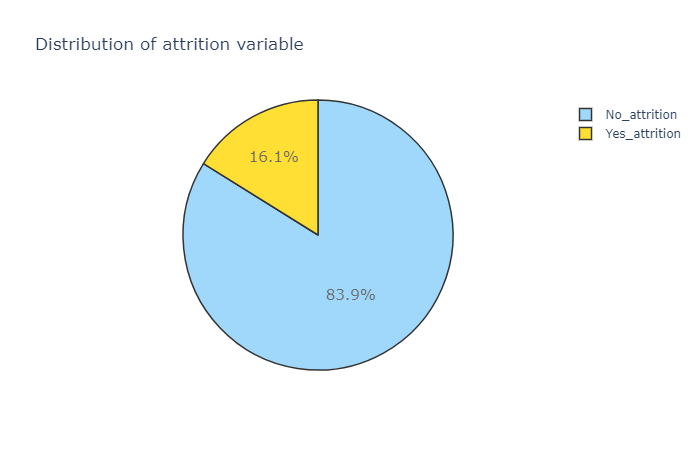

In [16]:
attrition = df[(df['Attrition'] == 1)]
no_attrition = df[(df['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], 
               orientation = 'h', opacity = 0.8, marker=dict(
                   color=['gold', 'lightskyblue'],
                   line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = go.Figure(data=[trace], layout=layout)
fig.show("png")

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           

fig = go.Figure(data=[trace], layout=layout)
fig.show("png")

from 1470 employee there is 237 employee or 16% employee who does **Attrition** or resign. Now we will find out the reason why employee does **Attrition**

### Gender

Between **Male** and **Female** which one who does the most **Attrition** and what is the reason? 

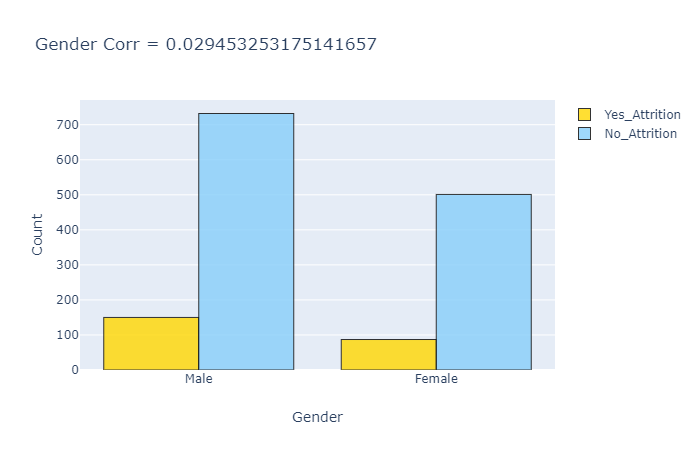

In [17]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['Gender'].value_counts().keys().tolist(),
       y=tmp1['Gender'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['Gender'].value_counts().keys().tolist(),
       y=tmp2['Gender'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Gender Corr = " + str(df['Attrition'].corr(data_dum['Gender_Male'])),
              xaxis= dict(title="Gender"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
#py.iplot(fig)
fig.show("png")

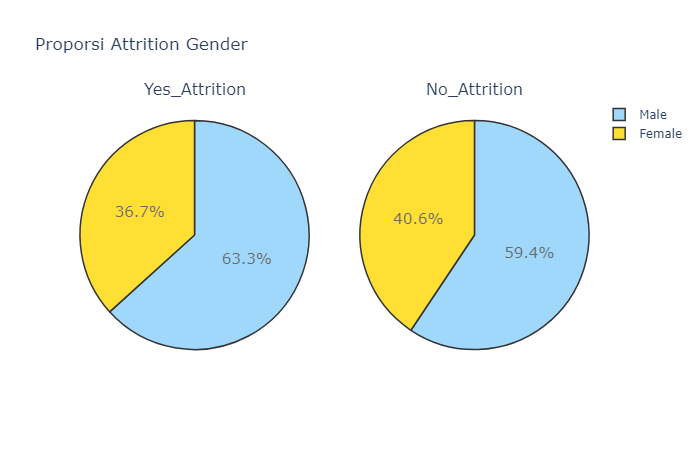

In [18]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['Gender'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['Gender'].value_counts()

fig.add_trace(go.Pie(labels = ["Male", "Female"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Male", "Female"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition Gender')
           
#fig = dict(data = [trace, trace2], layout=layout)
fig.show("png")

Based on Barplot **Gender** it can be seen that **Male** most likely to do **Yes_attrition** compared to **Female**. 

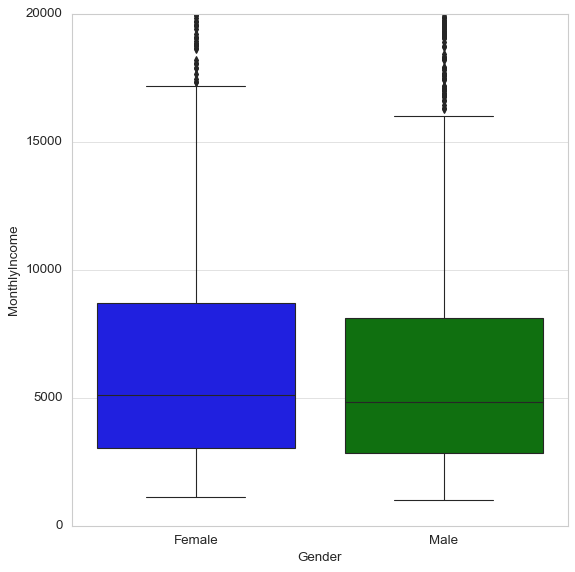

In [338]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Gender', y = 'MonthlyIncome', data = df)

From the Boxplot above we can see that the average of **MonthlyIncome** **Male** is lower then **Female**. Maybe thi is one of the reason where's **Male** have more **Attrition** rate than **Female**.

### JobRole

Find out which **JobRole** that have the highest **Attrition** and what's the reasons?

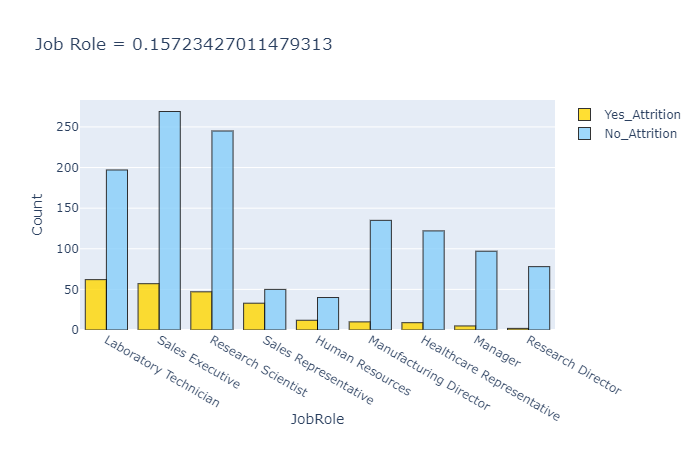

In [19]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['JobRole'].value_counts().keys().tolist(),
       y=tmp1['JobRole'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['JobRole'].value_counts().keys().tolist(),
       y=tmp2['JobRole'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Job Role = " + str(df['Attrition'].corr(data_dum['JobRole_Sales Representative'])),
              xaxis= dict(title="JobRole"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
fig.show("png")

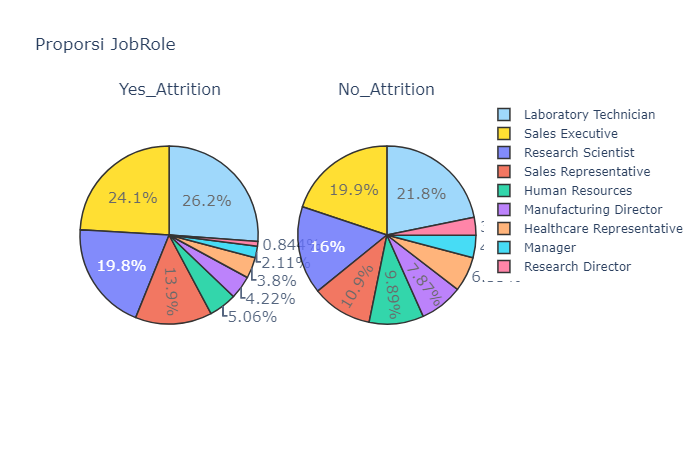

In [20]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['JobRole'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['JobRole'].value_counts()

fig.add_trace(go.Pie(labels = ["Laboratory Technician", "Sales Executive", 
                               "Research Scientist", 'Sales Representative', 
                               'Human Resources', 'Manufacturing Director', 
                               'Healthcare Representative', 'Manager', 
                               'Research Director'],
                     values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Laboratory Technician", "Sales Executive", 
                               "Research Scientist", 'Sales Representative', 
                               'Human Resources', 'Manufacturing Director', 
                               'Healthcare Representative', 'Manager', 
                               'Research Director'],
                     values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi JobRole')
           
#fig = dict(data = [trace, trace2], layout=layout)
fig.show("png")

The data above is showing that **JobRole** **Laboratory Technician** is the **JobRole** with rate **Yes_Attrition** the highest compare to other **JobRole**.<br>

While **Research Directory** is the **JobRole** with rate **Yes_Attrition** the lowest compare to other **JobRole**.

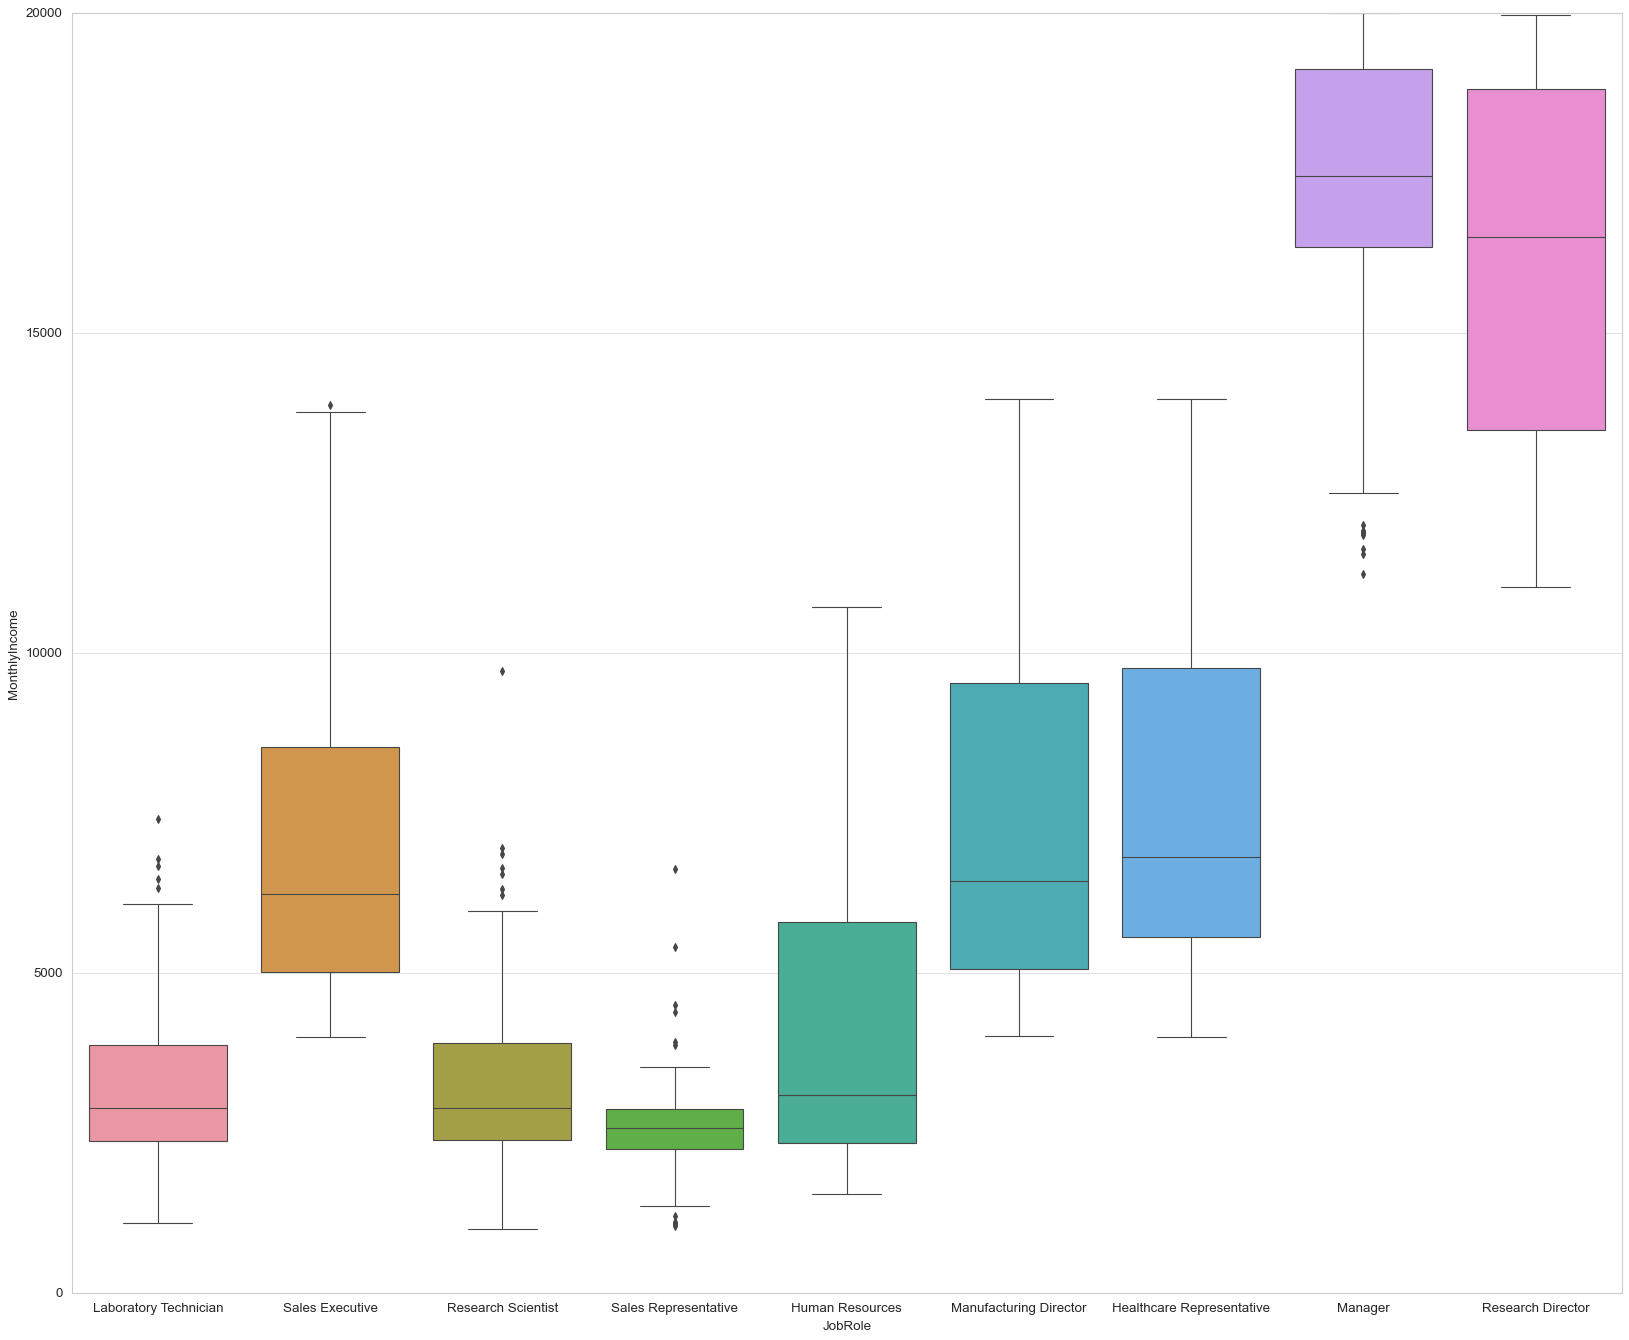

In [341]:
plt.figure(figsize = (25,20))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome', data = df,
            order=["Laboratory Technician", "Sales Executive", 
                   "Research Scientist", 'Sales Representative', 
                   'Human Resources', 'Manufacturing Director', 
                   'Healthcare Representative', 'Manager', 
                   'Research Director'])

**Laboratory Technician** have the lowest **MonthlyIncome** compare to other **JobRole** this might be one of the reasons why **Laboratory Technician** have the highest **Yes_Attrition**.

### JobLevel

Find out which **JobLevel** that have the highest Attrition and what's the reasons?

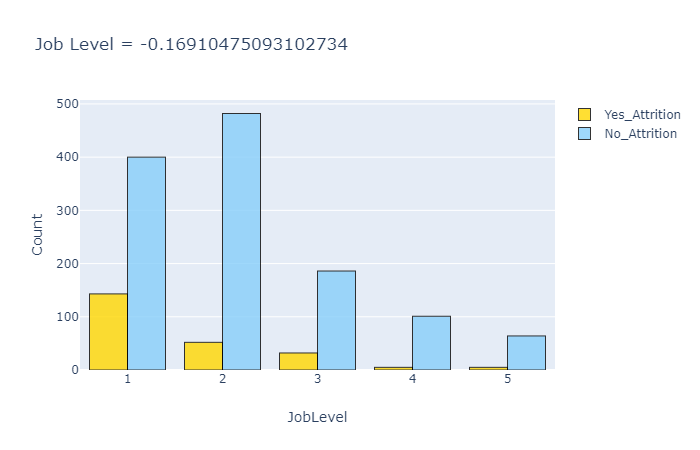

In [21]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['JobLevel'].value_counts().keys().tolist(),
       y=tmp1['JobLevel'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['JobLevel'].value_counts().keys().tolist(),
       y=tmp2['JobLevel'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Job Level = " + str(df['Attrition'].corr(data_dum['JobLevel'])),
              xaxis= dict(title="JobLevel"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
fig.show("png")

1 = Entry level, 2 = Intermediate, 3 = Experienced, 4 = Advanced, 5 = Expert

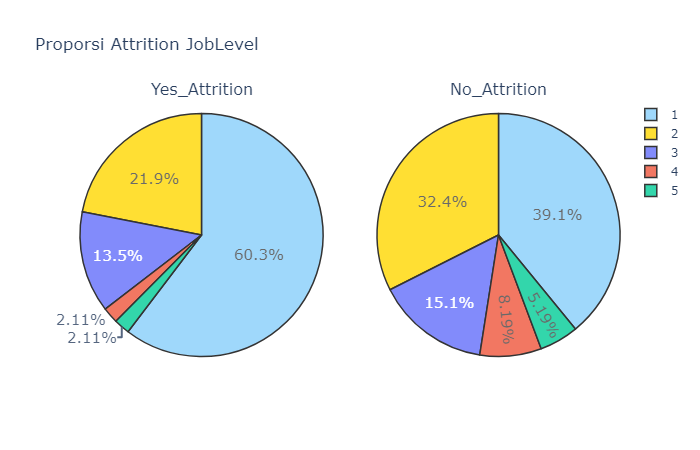

In [22]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['JobLevel'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['JobLevel'].value_counts()

fig.add_trace(go.Pie(labels = [1, 2, 3, 4, 5], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = [1, 2, 3, 4, 5], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition JobLevel')
           
#fig = dict(data = [trace, trace2], layout=layout)
fig.show("png")

1 = Entry level, 2 = Intermediate, 3 = Experienced, 4 = Advanced, 5 = Expert 

The data above is showing that **Entry Level** have the highest **Attrition** compare to other **JobLevel**.

### OverTime

How's **OverTime** effecting **Attrition**?

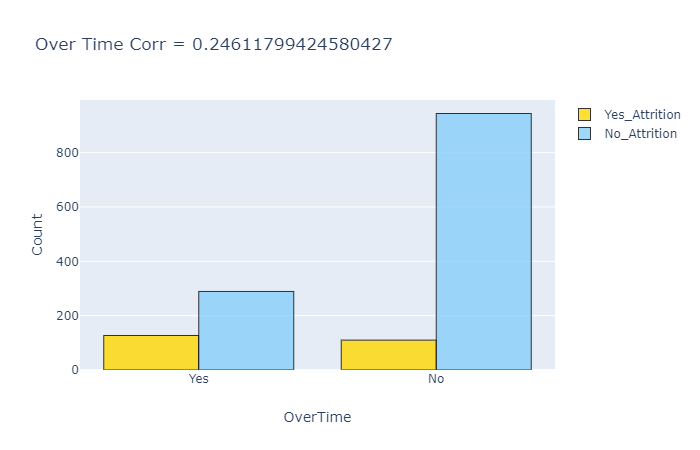

In [23]:
#Attrition yes = 1, no =0
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['OverTime'].value_counts().keys().tolist(),
       y=tmp1['OverTime'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['OverTime'].value_counts().keys().tolist(),
       y=tmp2['OverTime'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Over Time Corr = " + str(df['Attrition'].corr(data_dum['OverTime_Yes'])),
              xaxis= dict(title="OverTime"), 
              yaxis=dict(title='Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= ''))
              
fig = go.Figure(data=[bar1, bar2], layout=layout)
fig.show("png")

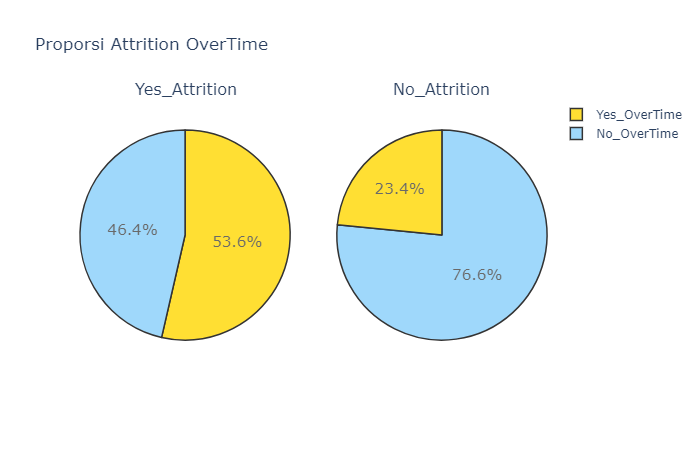

In [24]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['OverTime'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['OverTime'].value_counts()

fig.add_trace(go.Pie(labels = ["Yes_OverTime", "No_OverTime"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['gold','lightskyblue'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["No_OverTime", "Yes_OverTime"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition OverTime')
           
#fig = dict(data = [trace, trace2], layout=layout)
fig.show("png")

The data above is showing that when employee **Yes_OverTime** is more likely employee is **Yes_Attrition**. and vice versa if the employee **No_OverTime** is more likely employee is **No_Attrition**.

### Marital Status

How's **MaritalStatus** effecting **Attrition** rate?

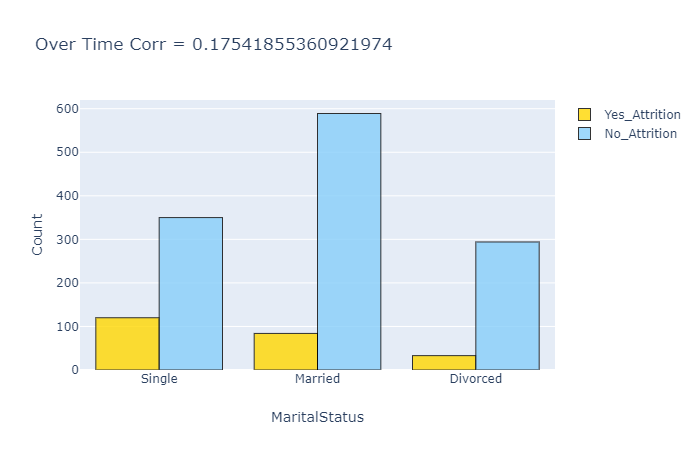

In [25]:
tmp1 = df[(df['Attrition'] == 1)]
tmp2 = df[(df['Attrition'] == 0)]

bar1 = go.Bar(x=tmp1['MaritalStatus'].value_counts().keys().tolist(),
       y=tmp1['MaritalStatus'].value_counts().values.tolist(),
       name='Yes_Attrition',opacity = 0.8, marker=dict(color='gold',line=dict(color='#000000',width=1)))

bar2 = go.Bar(x=tmp2['MaritalStatus'].value_counts().keys().tolist(),
       y=tmp2['MaritalStatus'].value_counts().values.tolist(),
       name='No_Attrition', opacity = 0.8, marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))

layout = dict(title = "Over Time Corr = " + str(df['Attrition'].corr(data_dum['MaritalStatus_Single'])),
              xaxis= dict(title="MaritalStatus"), 
              yaxis=dict(title='Count'))

fig = go.Figure(data=[bar1, bar2], layout=layout)
fig.show("png")

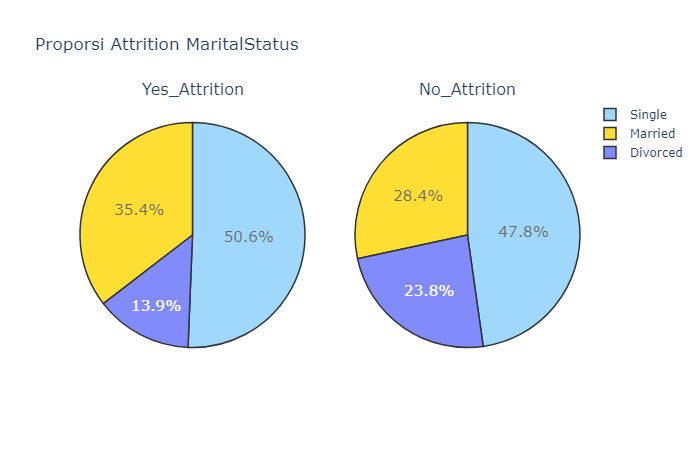

In [26]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Yes_Attrition', 'No_Attrition'])
Yes_Attrition = df[(df['Attrition'] == 1)]['MaritalStatus'].value_counts()
No_Attrition = df[(df['Attrition'] == 0)]['MaritalStatus'].value_counts()

fig.add_trace(go.Pie(labels = ["Single", "Married", "Divorced"], values = Yes_Attrition,
                     textfont=dict(size=15), opacity = 0.8,
                     name='Yes_Attrition',
                     marker=dict(colors=['lightskyblue','gold'], 
                                 line=dict(color='#000000', width=1.5))), 1, 1 )
fig.add_trace(go.Pie(labels = ["Single", "Married", "Divorced"], values = No_Attrition, 
                     textfont=dict(size=15), opacity = 0.8,
                     name='No_Attrition',
                     marker=dict(colors=['lightskyblue','gold'],
                                 line=dict(color='#000000', width=1.5))), 1, 2)


fig.update_layout(title_text =  'Proporsi Attrition MaritalStatus')
           
#fig = dict(data = [trace, trace2], layout=layout)
fig.show("png")

The data is showing that when employee with **MaritalStatus** is **Single** is more likely to **Yes_Attrition** then employee with **MaritalStatus** **Married** and **Divorced**.

### TotalWorkingYears

How's **TotalWorkingYears** effecting **Attrition**?

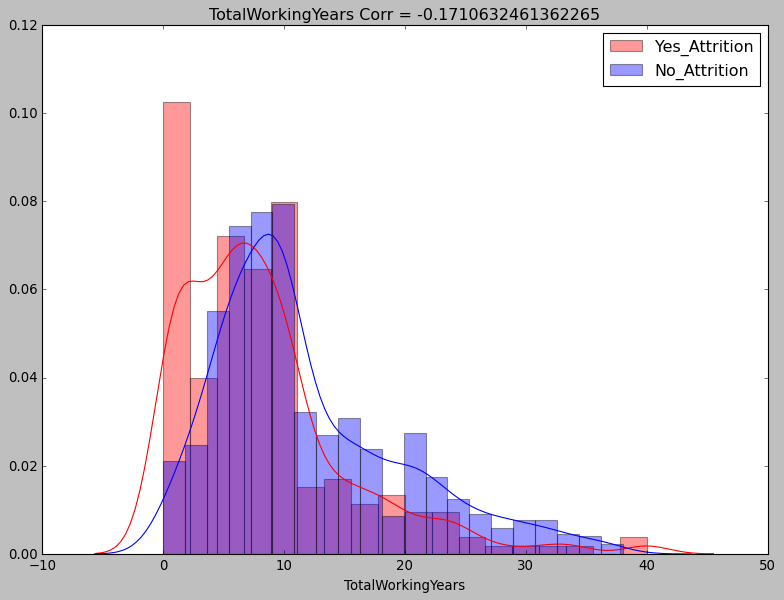

In [61]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot((df[df['Attrition'] == 1]['TotalWorkingYears']), label = 'Yes_Attrition', ax=ax, color='r')
sns.distplot((df[df['Attrition'] == 0 ]['TotalWorkingYears']), label = 'No_Attrition', ax=ax).set_title(("TotalWorkingYears Corr = " + str(df['Attrition'].corr(df['TotalWorkingYears']))))
plt.style.use('classic')
plt.legend()

In [182]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed
yes_attrition = skew(df[df['Attrition'] == 1]['TotalWorkingYears'])
no_attrition = skew(df[df['Attrition'] == 0]['TotalWorkingYears'])

print("distribusi data TotalWorkingYears pada yes_attrition memiliki nilai skewed " + str(yes_attrition))
print("distribusi data TotalWorkingYears pada no_attrition memiliki nilai skewed " + str(no_attrition))

distribusi data TotalWorkingYears pada yes_attrition memiliki nilai skewed 1.6774541418299111
distribusi data TotalWorkingYears pada no_attrition memiliki nilai skewed 1.0656247951885347


From the data we can see if **TotalWorkingYears** is between 1 and 2 years is more likely that employee to **Yes_Attrition**. 

### MonthlyIncome

How's **MonthlyIncome** effecting **Attrition**?

(0.0, 20000.0)

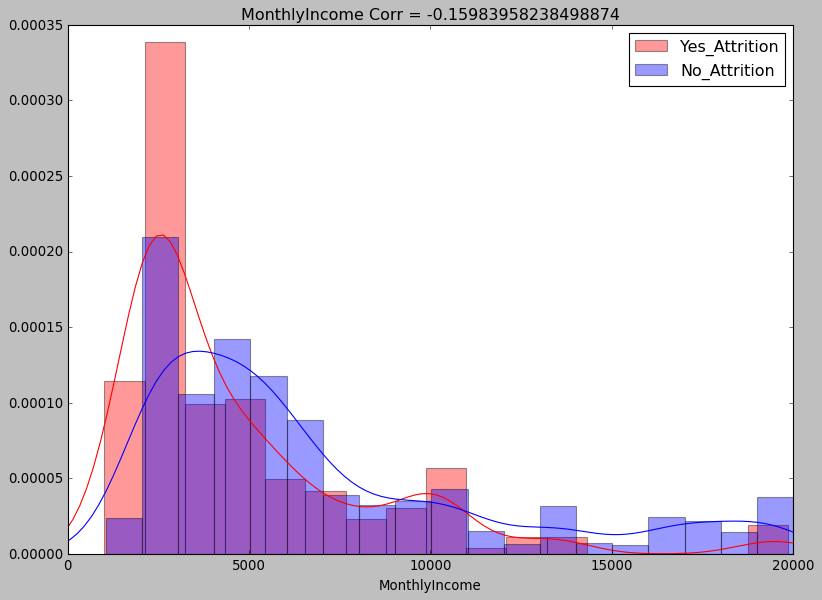

In [198]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot((df[df['Attrition'] == 1]['MonthlyIncome']), label = 'Yes_Attrition', ax=ax, color='r')
sns.distplot((df[df['Attrition'] == 0 ]['MonthlyIncome']), label = 'No_Attrition', ax=ax).set_title(("MonthlyIncome Corr = " + str(df['Attrition'].corr(df['MonthlyIncome']))))
plt.style.use('classic')
plt.legend()
plt.xlim(0, 20000)

The data is showing that employee with **MonthlyIncome** in range 2000 - 3000 have the highest **Yes_Attritiion**.<br>


Meanwhile employee with **MonthlyIncome** above 3000 have the lowest **Yes_Attrition** rate.

### Conclusion

After we do some EDA we can find out how's **Gender**, **JobRole**, **OverTime**, **MaritalStatus**, **JobLevel**, **TotalWorkingYears**, and **MonthlyIncome** effecting **Attrition**.
<ol>
<li>From Gender we can see that Male is having Yes_Attrition greater than Female One of the reasons is maybe because Male have the lowest MonthlyIncome compare to Female.</li>
<li>From JobRole we can see that Laboratory Technician is having Yes_Attrition greater than other JobRole One of the reasons is maybe because Laboratory Technician have the lowest MonthlyIncome compare to other JobRole.</li>
<li>From OverTime we can see when employee is No_Overtime is more likely  No_Attrition and vice versa if employee is Yes_Overtime is more likely  Yes_Attrition. </li>
<li>From MaritalStatus we can see when employee with MaritalStatus Single is more likely to Yes_Attrition compare to employee with MaritalStatus Married and Divorced.</li>
<li>From JobLevel we can see when employee with JobLevel 1 or entry level have Yes_Attrition rate the highest.</li>
<li>TotalWorkingYears showing if employee have TotalWorkingYears 1 - 2 years is more likely Yes_Attrition compared with employee with TotalWorkingYears above 3 years.</li>
<li>MonthlyIncome showing if employee have MonthlyIncome 1000 - 3000 more likely to Yes_Attrition compared with employee have MonthlyIncome above 3000</li>
</ol>

## Machine Learning Models 

In [7]:
#Splitting Data into Train and Test sets
target = 'Attrition'

X_train, X_test, y_train, y_test = train_test_split(
    data_dum.drop([target], axis=1), 
    data_dum[target], 
    random_state=42, test_size=0.3)

In [8]:
y_train.value_counts()

0    853
1    176
Name: Attrition, dtype: int64

In [9]:
sm = SMOTE(sampling_strategy="minority")
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)

oversampled_trainX = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [10]:
oversampled_trainY.value_counts()

1    853
0    853
Name: Attrition, dtype: int64

### Train Normal Data with Random Forest, Linear Regression, GradienBoost

### Random Forest

In [11]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100, random_state=42)

# fit the model
rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

# Classification Reports 
print("Random Forest")
print(classification_report(y_test, predict_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



### Logistik Regression

In [12]:
# LogReg Model Building

logmodel = LogisticRegression(random_state=42)

# fit the model
logmodel.fit(X_train,y_train)
#Predict Model
predictions = logmodel.predict(X_test)

# Classification Reports 
print("LogReg")
print(classification_report(y_test, predictions))

LogReg
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.86      0.80       441



C:\Users\AIAAUser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Gradient Boosting

In [13]:
# Gradien Boosting Model Building

gb = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100, random_state=42)
# fit the model
gb.fit(X_train, y_train)
#Predict Model
gb_predict = gb.predict(X_test)

# Classification Reports 
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.86      0.80       441



### Conclusion Train Normal Data

In [30]:
# Random Forest
print("Random Forest")
print(classification_report(y_test, predict_rf))
print('\n')

# LogReg
print("LogReg")
print(classification_report(y_test, predictions))
print('\n')

# Gradient Boost
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



LogReg
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.86      0.80       441



Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.

### Oversampled Normal Data with Random Forest, KNN, Gradient Boost

#### Random Forest

In [31]:
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100, random_state=42 )
# di tunning dulu
# fit the model
rf_model.fit(oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY)
#Predict Model
predict_rf = rf_model.predict(X_test)

# Classification Reports 
print("Random Forest")
print(classification_report(y_test, predict_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       380
           1       0.41      0.28      0.33        61

    accuracy                           0.85       441
   macro avg       0.65      0.61      0.62       441
weighted avg       0.82      0.85      0.83       441



#### Logistic Regression

In [32]:
# LogReg Model Building
logmodel = LogisticRegression(random_state=42)

# fit the model
logmodel.fit(oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY)
#Predict Model
predictions = logmodel.predict(X_test)

# Classification Reports 
print("LogReg")
print(classification_report(y_test, predictions))

LogReg
              precision    recall  f1-score   support

           0       0.90      0.65      0.75       380
           1       0.20      0.56      0.30        61

    accuracy                           0.63       441
   macro avg       0.55      0.60      0.53       441
weighted avg       0.80      0.63      0.69       441



C:\Users\AIAAUser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Gradient Boosting

In [33]:
# Random Forest Model Building

gb = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100, random_state=42)
# fit the model
gb.fit(oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY)
#Predict Model
gb_predict = gb.predict(X_test)

# Classification Reports 
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       380
           1       0.34      0.41      0.37        61

    accuracy                           0.81       441
   macro avg       0.62      0.64      0.63       441
weighted avg       0.82      0.81      0.82       441



In [19]:
# Random Forest

print("Random Forest")
print(classification_report(y_test, predict_rf))
print('\n')

# Logistic Regression 
print("LogReg")
print(classification_report(y_test, predictions))
print('\n')

# Gradient Boost
print("Gradient Boosting")
print(classification_report(y_test, gb_predict))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       371
           1       0.40      0.23      0.29        70

    accuracy                           0.82       441
   macro avg       0.63      0.58      0.59       441
weighted avg       0.79      0.82      0.80       441



LogReg
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       371
           1       0.20      0.37      0.26        70

    accuracy                           0.66       441
   macro avg       0.53      0.54      0.52       441
weighted avg       0.75      0.66      0.70       441



Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       371
           1       0.35      0.34      0.35        70

    accuracy                           0.79       441
   macro avg       0.61      0.61      0.61       441
weighted avg       0.79      0.

### Random Forest with hyperparameters tunning Grid Search cv

In [34]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [35]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 79.2min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(bootstrap=False, min_samples_split=5)

In [23]:
print_score(rf_clf,oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY, X_test, y_test, train=True)
print_score(rf_clf,oversampled_trainX.drop(['Attrition'], axis=1), oversampled_trainY, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    862.0  862.0       1.0     1724.0        1724.0
_______________________________________________
Confusion Matrix: 
 [[862   0]
 [  0 862]]

Test Result:
Accuracy Score: 83.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859564   0.428571    0.8322    0.644068      0.791153
recall       0.956873   0.171429    0.8322    0.564151      0.832200
f1-score     0.905612   0.244898    0.8322    0.575255      0.800737
support    371.000000  70.000000    0.8322  441.000000    441.000000
_______________________________________________
Conf

### Feature Important Analysis

In [24]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(5,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.style.use("classic")
    plt.ylabel('FEATURE NAMES')


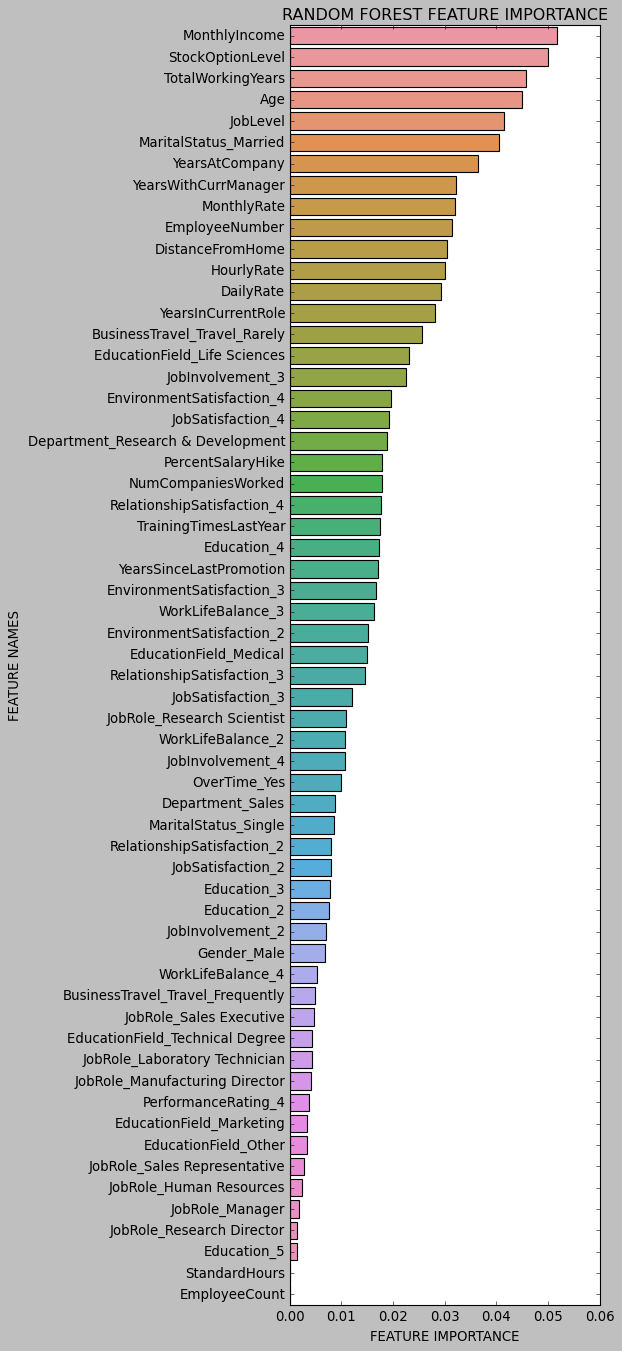

In [27]:
plot_feature_importance(rf_clf.feature_importances_,oversampled_trainX.drop(['Attrition'], axis=1).columns,'RANDOM FOREST')

### Model Evaluation

In [89]:
predictions_proba = rf_cv.predict_proba(X_test)
predictions_proba[:,1]

array([0.117, 0.163, 0.248, 0.548, 0.075, 0.158, 0.418, 0.318, 0.284,
       0.099, 0.242, 0.464, 0.227, 0.372, 0.183, 0.141, 0.12 , 0.318,
       0.139, 0.173, 0.104, 0.33 , 0.34 , 0.274, 0.176, 0.181, 0.075,
       0.41 , 0.239, 0.267, 0.221, 0.215, 0.338, 0.286, 0.214, 0.126,
       0.198, 0.12 , 0.234, 0.238, 0.137, 0.307, 0.336, 0.262, 0.69 ,
       0.105, 0.163, 0.38 , 0.364, 0.232, 0.144, 0.153, 0.459, 0.378,
       0.234, 0.08 , 0.169, 0.128, 0.512, 0.131, 0.096, 0.166, 0.38 ,
       0.115, 0.291, 0.488, 0.604, 0.427, 0.175, 0.129, 0.535, 0.337,
       0.201, 0.27 , 0.331, 0.19 , 0.465, 0.576, 0.212, 0.247, 0.177,
       0.141, 0.208, 0.312, 0.454, 0.204, 0.274, 0.193, 0.364, 0.13 ,
       0.211, 0.364, 0.2  , 0.288, 0.247, 0.303, 0.09 , 0.184, 0.195,
       0.144, 0.178, 0.222, 0.371, 0.374, 0.127, 0.683, 0.209, 0.176,
       0.239, 0.211, 0.254, 0.168, 0.211, 0.074, 0.211, 0.279, 0.445,
       0.547, 0.313, 0.234, 0.192, 0.156, 0.242, 0.268, 0.197, 0.207,
       0.107, 0.289,

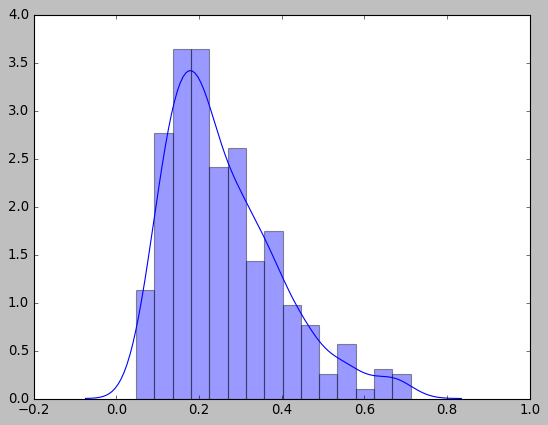

In [88]:
sns.distplot(predictions_proba[:,1])

In [87]:
df_tmp = pd.DataFrame()
df_tmp['y_test'] = y_test
df_tmp['pred_score'] = predictions_proba[:,1]
df_tmp

,y_test,pred_score
353,0,0.117
812,0,0.163
449,0,0.248
1168,0,0.548
969,0,0.075
...,...,...
1293,0,0.530
761,1,0.338
870,0,0.088
959,0,0.134


In [90]:
for enum, i in enumerate(np.linspace(0,1,11)):
    df_tmp['y_pred_{}'.format(enum)] = df_tmp['pred_score'].apply(
        lambda x: 1 if x < i else 0)

In [91]:
df_tmp

,y_test,pred_score,y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9,y_pred_10
353,0,0.117,0,0,1,1,1,1,1,1,1,1,1
812,0,0.163,0,0,1,1,1,1,1,1,1,1,1
449,0,0.248,0,0,0,1,1,1,1,1,1,1,1
1168,0,0.548,0,0,0,0,0,0,1,1,1,1,1
969,0,0.075,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0.530,0,0,0,0,0,0,1,1,1,1,1
761,1,0.338,0,0,0,0,1,1,1,1,1,1,1
870,0,0.088,0,1,1,1,1,1,1,1,1,1,1
959,0,0.134,0,0,1,1,1,1,1,1,1,1,1


In [92]:
for i in range(0,11):
    tp = len(df_tmp[(df_tmp['y_test'] == 1) & (df_tmp['y_pred_{}'.format(i)] == 1)])
    fn = len(df_tmp[(df_tmp['y_test'] == 1) & (df_tmp['y_pred_{}'.format(i)] == 0)])
    fp = len(df_tmp[(df_tmp['y_test'] == 0) & (df_tmp['y_pred_{}'.format(i)] == 1)])
    recall = tp/(fn + tp)
    errors = fn + fp
    print('recall treshold ke-{} adalah {} dengan errors {}'.format(i,recall,errors))

recall treshold ke-0 adalah 0.0 dengan errors 70
recall treshold ke-1 adalah 0.02857142857142857 dengan errors 92
recall treshold ke-2 adalah 0.12857142857142856 dengan errors 226
recall treshold ke-3 adalah 0.37142857142857144 dengan errors 316
recall treshold ke-4 adalah 0.6428571428571429 dengan errors 358
recall treshold ke-5 adalah 0.8285714285714286 dengan errors 368
recall treshold ke-6 adalah 0.8857142857142857 dengan errors 375
recall treshold ke-7 adalah 0.9857142857142858 dengan errors 372
recall treshold ke-8 adalah 1.0 dengan errors 371
recall treshold ke-9 adalah 1.0 dengan errors 371
recall treshold ke-10 adalah 1.0 dengan errors 371


From seeing the data above we choose threshold 1 that is 0,028 because have the least errors that is 92

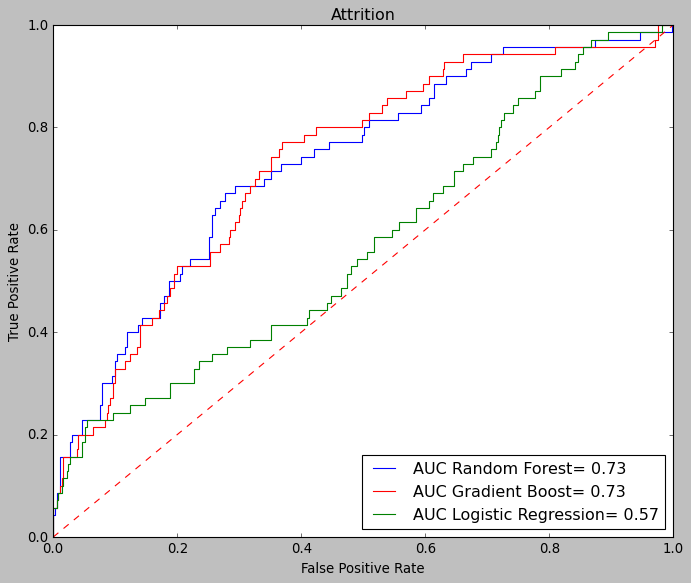

In [86]:
#Rf Model
PredictProb_rf = rf_model.predict_proba(X_test)

preds_RF = PredictProb_rf[:,1]
fpr_0, tpr_0, threshold = roc_curve(y_test, preds_RF)
roc_auc_0 = auc(fpr_0, tpr_0)

#Gradient Boosting
PredictProb_gb = gb.predict_proba(X_test)

preds_gb = PredictProb_gb[:,1]
fpr_1, tpr_1, threshold = roc_curve(y_test, preds_gb)
roc_auc_1 = auc(fpr_1, tpr_1)

# Logistic Regression
PredictProb_logmodel = logmodel.predict_proba(X_test)

preds_logmodel = PredictProb_logmodel[:,1]
fpr_2, tpr_2, threshold = roc_curve(y_test, preds_logmodel)
roc_auc_2 = auc(fpr_2, tpr_2)



import matplotlib.pyplot as plt
plt.style.use('classic')
plt.figure(figsize=(10,8))
plt.title('Attrition')
plt.plot(fpr_0, tpr_0, 'b', label = 'AUC Random Forest= {}'.format(round(roc_auc_0, 2)))
plt.plot(fpr_1, tpr_1, 'r', label = 'AUC Gradient Boost= {}'.format(round(roc_auc_1, 2)))
plt.plot(fpr_2, tpr_2, 'g', label = 'AUC Logistic Regression= {}'.format(round(roc_auc_2, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
